In [1]:
import pandas as pd
from Bio.SeqIO.FastaIO import SimpleFastaParser
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [2]:
samples = [
    "cc4_1", "cc4_2", "cc4_3",
    "cd4_1", "cd4_2", "cd4_3",
    "mc4_1", "mc4_2", "mc4_3",
    "md4_1", "md4_2", "md4_3",
    "fc4_1", "fc4_2", "fc4_3",
    "fd4_1", "fd4_2", "fd4_3",
]

besthit_n_orf = {}
argclass_n_orf = {}
arg_n_orf = {}

for s in samples:
    base = f"../results_metaspades/{s}/deeparg/{s}_output.mapping.ARG"

    rawdf = pd.read_csv(base, sep="\t")
    df = rawdf[rawdf["identity"] > 70]

    grp_besthit = df.groupby(by="best-hit").count().reset_index()
    grp_besthit.rename(columns={"best-hit": "best_hit"}, inplace=True)
    besthit_n_orf[s] = grp_besthit
    
    grp_argclass = df.groupby(by="predicted_ARG-class").count().reset_index()
    grp_argclass.rename(columns={"predicted_ARG-class": "predicted_ARG_class"}, inplace=True)
    argclass_n_orf[s] = grp_argclass
    
    grp_arg = df.groupby(by="#ARG").count().reset_index()
    grp_arg.rename(columns={"#ARG": "ARG"}, inplace=True)
    arg_n_orf[s] = grp_arg

In [3]:
all_besthit = []
for _, i in besthit_n_orf.items():
    all_besthit += list(i.best_hit.unique())
    
unique_all_besthit = list(set(all_besthit))
print(len(unique_all_besthit))


m_besthit = pd.DataFrame(unique_all_besthit, columns=["best_hit"])

for s, i in besthit_n_orf.items():
    temp_besthit = i.loc[:, ["best_hit", "read_id"]]
    temp_besthit.rename(columns={"read_id": s}, inplace=True)
    temp = pd.merge(m_besthit, temp_besthit, how="left", on="best_hit")
    m_besthit = temp.copy()
    
m_besthit


22


,best_hit,cc4_1,cc4_2,cc4_3,cd4_1,cd4_2,cd4_3,mc4_1,mc4_2,mc4_3,md4_1,md4_2,md4_3,fc4_1,fc4_2,fc4_3,fd4_1,fd4_2,fd4_3
0,YP_001563294|FEATURES|bacA|bacitracin|bacA,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN
1,YP_002552549|FEATURES|bacA|bacitracin|bacA,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,4.0,1.0,1.0,2.0
2,BAD59497.1|FEATURES|rpoB2|multidrug|rpoB2,NaN,3.0,3.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,YP_985461|FEATURES|bacA|bacitracin|bacA,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YP_316450|FEATURES|bacA|bacitracin|bacA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,2.0,1.0,NaN
5,AF001493.1.orf0.gene.p01|FEATURES|ADP-ribosyla...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,ABM94007|FEATURES|bacA|bacitracin|bacA,9.0,17.0,15.0,6.0,4.0,3.0,1.0,2.0,4.0,1.0,1.0,1.0,7.0,7.0,8.0,1.0,4.0,1.0
7,NP_415222.1|FEATURES|kdpE|aminoglycoside|kdpE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,EU408351.1.gene26.p01|FEATURES|LRA-12|beta-lac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9,YP_970399|FEATURES|bacA|bacitracin|bacA,1.0,2.0,3.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,3.0,2.0,2.0,1.0,2.0,1.0


In [4]:
all_argclass = []
for _, i in argclass_n_orf.items():
    all_argclass += list(i.predicted_ARG_class.unique())
    
    
unique_all_argclass = list(set(all_argclass))
print(len(unique_all_argclass))


m_argclass = pd.DataFrame(unique_all_argclass, columns=["predicted_ARG_class"])

for s, i in argclass_n_orf.items():
    temp_argclass = i.loc[:, ["predicted_ARG_class", "read_id"]]
    temp_argclass.rename(columns={"read_id": s}, inplace=True)
    temp = pd.merge(m_argclass, temp_argclass, how="left", on="predicted_ARG_class")
    m_argclass = temp.copy()
    
m_argclass

7


,predicted_ARG_class,cc4_1,cc4_2,cc4_3,cd4_1,cd4_2,cd4_3,mc4_1,mc4_2,mc4_3,md4_1,md4_2,md4_3,fc4_1,fc4_2,fc4_3,fd4_1,fd4_2,fd4_3
0,bacitracin,12.0,24.0,22.0,10.0,6.0,7.0,1.0,2.0,5.0,3.0,4.0,7.0,13.0,12.0,15.0,5.0,9.0,4.0
1,aminoglycoside,NaN,2.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,4.0,5.0,NaN,2.0,NaN
2,multidrug,1.0,6.0,8.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,fosmidomycin,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,peptide,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN
5,beta-lactam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
6,rifamycin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_arg = []
for _, i in arg_n_orf.items():
    all_arg += list(i.ARG.unique())
    
    
unique_all_arg = list(set(all_arg))
print(len(unique_all_arg))


m_arg = pd.DataFrame(unique_all_arg, columns=["ARG"])

for s, i in arg_n_orf.items():
    temp_arg = i.loc[:, ["ARG", "read_id"]]
    temp_arg.rename(columns={"read_id": s}, inplace=True)
    temp = pd.merge(m_arg, temp_arg, how="left", on="ARG")
    m_arg = temp.copy()
    
m_arg

10


,ARG,cc4_1,cc4_2,cc4_3,cd4_1,cd4_2,cd4_3,mc4_1,mc4_2,mc4_3,md4_1,md4_2,md4_3,fc4_1,fc4_2,fc4_3,fd4_1,fd4_2,fd4_3
0,AAC(6')-II,NaN,2.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,4.0,5.0,NaN,2.0,NaN
1,BPEF,1.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BACA,12.0,24.0,22.0,10.0,6.0,7.0,1.0,2.0,5.0,3.0,4.0,7.0,13.0,12.0,15.0,5.0,9.0,4.0
3,RPOB2,NaN,3.0,3.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,OMPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,ROSA,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,LRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7,UGD,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN
8,ADP-RIBOSYLATING_TRANSFERASE_ARR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,KDPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def adapt_df_for_PCA(df, pivot):
    raw_newdf = df.T.reset_index()
    newdf = raw_newdf.replace(np.nan, 0, regex=True)

    new_header = newdf.iloc[0] #grab the first row for the header
    newdf = newdf[1:] #take the data less the header row
    newdf.columns = new_header #set the header row as the df header

    sample_id = {
        "cc4": 0,
        "cd4": 1,
        "mc4": 2,
        "md4": 3,
        "fc4": 4,
        "fd4": 5
    }
#     print(newdf)
    newdf["sample"] = newdf.apply(lambda x: x[pivot].split("_")[0] , axis=1)
    newdf["sample_ids"] = newdf.apply(lambda x: sample_id[x["sample"]], axis=1)
    
    macro_sample_id = {
        "c": 0,
        "m": 1,
        "f": 2,
    }
    
    macro_sample_location = {
        "c": "Suna Canottieri",
        "m": "Teatro Maggiore",
        "f": "Fondo Toce",
    }
    newdf["macro_sample"] = newdf.apply(lambda x: x[pivot][0] , axis=1)
    newdf["macro_sample_ids"] = newdf.apply(lambda x: macro_sample_id[x["macro_sample"]], axis=1)
    newdf["macro_sample_location"] = newdf.apply(lambda x: macro_sample_location[x["macro_sample"]], axis=1)
    newdf["coast_deep_shapes"] = newdf.apply(lambda x: "coast" if x["sample"][1] == "c" else "deep", axis=1)
    
    return newdf

In [9]:
argclass_features = sorted(m_argclass["predicted_ARG_class"])

arg_features = sorted(m_arg["ARG"])

best_hit_features = sorted(m_besthit["best_hit"])

print("argclass_features")
print(repr(argclass_features))

print("arg_features")
print(repr(arg_features))

print("besthit_features")
print(repr(best_hit_features))

argclass_features
['aminoglycoside', 'bacitracin', 'beta-lactam', 'fosmidomycin', 'multidrug', 'peptide', 'rifamycin']
arg_features
["AAC(6')-II", 'ADP-RIBOSYLATING_TRANSFERASE_ARR', 'BACA', 'BPEF', 'KDPE', 'LRA', 'OMPR', 'ROSA', 'RPOB2', 'UGD']
besthit_features
['AAC75089.1|FEATURES|ugd|peptide|ugd', 'ABM94007|FEATURES|bacA|bacitracin|bacA', 'AF001493.1.orf0.gene.p01|FEATURES|ADP-ribosylating_transferase_arr|rifamycin|ADP-ribosylating_transferase_arr', 'AL939114.1.orf1.gene.p01|FEATURES|ADP-ribosylating_transferase_arr|rifamycin|ADP-ribosylating_transferase_arr', 'BAD59497.1|FEATURES|rpoB2|multidrug|rpoB2', "EF614235.1.gene3.p01|FEATURES|aac(6')-II|aminoglycoside|aac(6')-II", 'EU408351.1.gene26.p01|FEATURES|LRA-12|beta-lactam|LRA', "L06163.1.gene1.p01|FEATURES|aac(6')-II|aminoglycoside|aac(6')-II", "M29695.1.gene2.p01|FEATURES|aac(6')-II|aminoglycoside|aac(6')-II", 'NP_415222.1|FEATURES|kdpE|aminoglycoside|kdpE', 'YP_001401993|FEATURES|rosA|fosmidomycin|rosA', 'YP_001563294|FEATURES|b

In [13]:
def PCA_and_plot(df, features):
    pca = PCA()
    components = pca.fit_transform(df[features])
    
    colors_samples_id = df["sample_ids"]
    colors_samples = df["sample"]
    
    Xt = components
    
    colors_samples_id = df["sample_ids"]
    colors_samples = df["sample"]

    plot = plt.scatter(Xt[:,0], Xt[:,1], c=colors_samples_id, cmap="Paired")
    plt.legend(handles=plot.legend_elements()[0], labels=sorted(set(colors_samples)))
    plt.show()
    
    
def PCA_and_plot_MACROSAMPLE(df, features):
    pca = PCA()
    components = pca.fit_transform(df[features])
    
    colors_samples_id = df["macro_sample_ids"]
    colors_samples = df["macro_sample"]
    
    Xt = components
    
    colors_samples_id = df["macro_sample_ids"]
    colors_samples = df["macro_sample_location"]
    shapes_samples = list(df["coast_deep_shapes"])

#     plot = plt.scatter(Xt[:,0], Xt[:,1], c=colors_samples_id, cmap="Paired", marker=shapes_samples)
    
    plot = sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=colors_samples, palette="tab10", style=shapes_samples)
    
#     plt.legend(handles=plot.legend_elements()[0], labels=sorted(set(colors_samples)))
    plt.show()

# PCA

## m_besthit

In [10]:
bh_newdf = adapt_df_for_PCA(m_besthit, pivot="best_hit")
bh_newdf.to_csv("deeparg_besthit_table.tsv", sep="\t", index=False, header=True)
bh_newdf

,best_hit,YP_001563294|FEATURES|bacA|bacitracin|bacA,YP_002552549|FEATURES|bacA|bacitracin|bacA,BAD59497.1|FEATURES|rpoB2|multidrug|rpoB2,YP_985461|FEATURES|bacA|bacitracin|bacA,YP_316450|FEATURES|bacA|bacitracin|bacA,AF001493.1.orf0.gene.p01|FEATURES|ADP-ribosylating_transferase_arr|rifamycin|ADP-ribosylating_transferase_arr,ABM94007|FEATURES|bacA|bacitracin|bacA,NP_415222.1|FEATURES|kdpE|aminoglycoside|kdpE,EU408351.1.gene26.p01|FEATURES|LRA-12|beta-lactam|LRA,...,YP_001401993|FEATURES|rosA|fosmidomycin|rosA,L06163.1.gene1.p01|FEATURES|aac(6')-II|aminoglycoside|aac(6')-II,EF614235.1.gene3.p01|FEATURES|aac(6')-II|aminoglycoside|aac(6')-II,ZP_02465589|FEATURES|bpeF|multidrug|bpeF,sample,sample_ids,macro_sample,macro_sample_ids,macro_sample_location,coast_deep_shapes
1,cc4_1,1.0,0,0,0,0,0,9.0,0,0,...,0,0,0,0,cc4,0,c,0,Suna Canottieri,coast
2,cc4_2,1.0,1.0,3.0,0,0,0,17.0,0,0,...,0,0,2.0,0,cc4,0,c,0,Suna Canottieri,coast
3,cc4_3,1.0,1.0,3.0,0,0,0,15.0,0,0,...,1.0,0,2.0,2.0,cc4,0,c,0,Suna Canottieri,coast
4,cd4_1,0,1.0,1.0,0,0,0,6.0,0,0,...,0,0,0,0,cd4,1,c,0,Suna Canottieri,deep
5,cd4_2,0,0,1.0,0,0,0,4.0,0,0,...,0,0,0,0,cd4,1,c,0,Suna Canottieri,deep
6,cd4_3,0,1.0,0,1.0,0,0,3.0,0,0,...,0,0,0,0,cd4,1,c,0,Suna Canottieri,deep
7,mc4_1,0,0,0,0,0,0,1.0,0,0,...,0,0,0,0,mc4,2,m,1,Teatro Maggiore,coast
8,mc4_2,0,0,1.0,0,0,0,2.0,0,0,...,0,0,0,0,mc4,2,m,1,Teatro Maggiore,coast
9,mc4_3,0,0,0,0,0,0,4.0,0,0,...,0,0,0,0,mc4,2,m,1,Teatro Maggiore,coast
10,md4_1,0,1.0,0,0,0,0,1.0,0,0,...,0,0,0,0,md4,3,m,1,Teatro Maggiore,deep


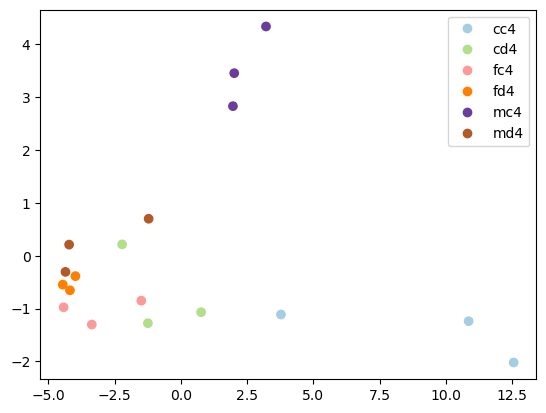

In [15]:
PCA_and_plot(bh_newdf, best_hit_features)

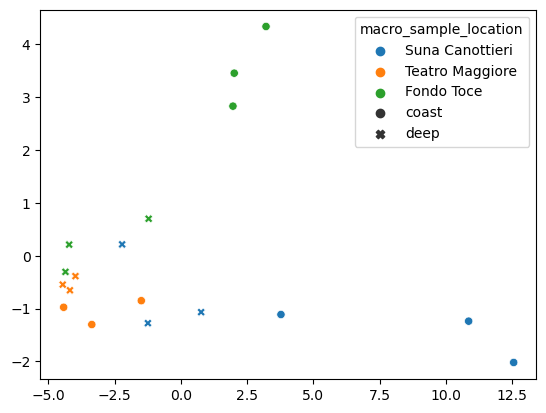

In [19]:
PCA_and_plot_MACROSAMPLE(bh_newdf, best_hit_features)

## m_argclass

In [11]:
ac_newdf = adapt_df_for_PCA(m_argclass, pivot="predicted_ARG_class")
ac_newdf.to_csv("deeparg_argclass_table.tsv", sep="\t", index=False, header=True)

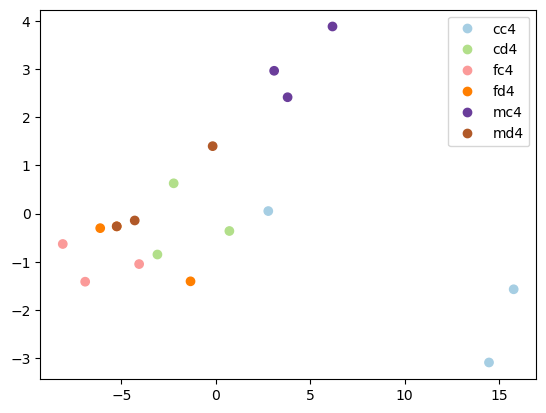

In [21]:
PCA_and_plot(ac_newdf, features=argclass_features)

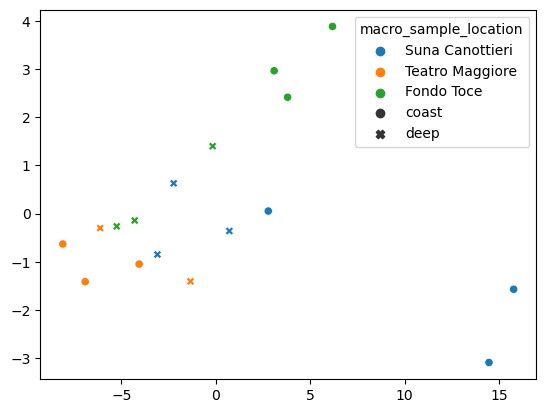

In [22]:
PCA_and_plot_MACROSAMPLE(ac_newdf, features=argclass_features)

## m_arg

In [12]:
arg_newdf = adapt_df_for_PCA(m_arg, pivot="ARG")
arg_newdf.to_csv("deeparg_arg_table.tsv", sep="\t", index=False, header=True)

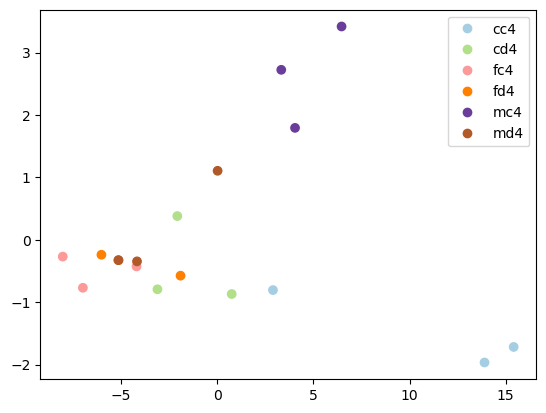

In [24]:
PCA_and_plot(arg_newdf, features=arg_features)

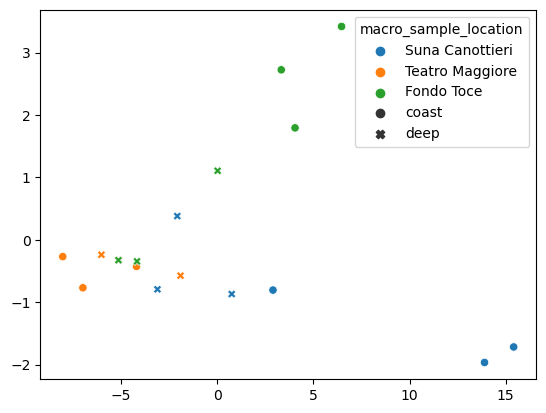

In [25]:
PCA_and_plot_MACROSAMPLE(arg_newdf, features=arg_features)

# NMDS

In [26]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## m_besthit

In [27]:
bh_X = bh_newdf[best_hit_features]

bh_dist_manhattan = manhattan_distances(bh_X)
bh_nmds = MDS(dissimilarity='precomputed', random_state=0, metric=False)

bh_nmds_Xt = bh_nmds.fit_transform(bh_dist_manhattan)


/home/davide/mambaforge/envs/microbial_res/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


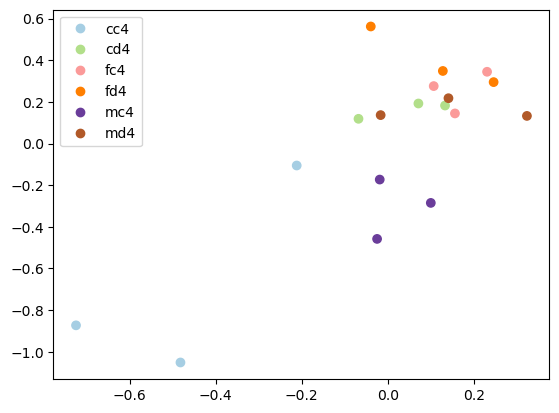

In [29]:
bh_colors_samples_id = bh_newdf["sample_ids"]
bh_colors_samples    = bh_newdf["sample"]

plot = plt.scatter(bh_nmds_Xt[:,0], bh_nmds_Xt[:,1], c=bh_colors_samples_id, cmap="Paired")
plt.legend(handles=plot.legend_elements()[0], labels=sorted(set(bh_colors_samples)))
plt.show()

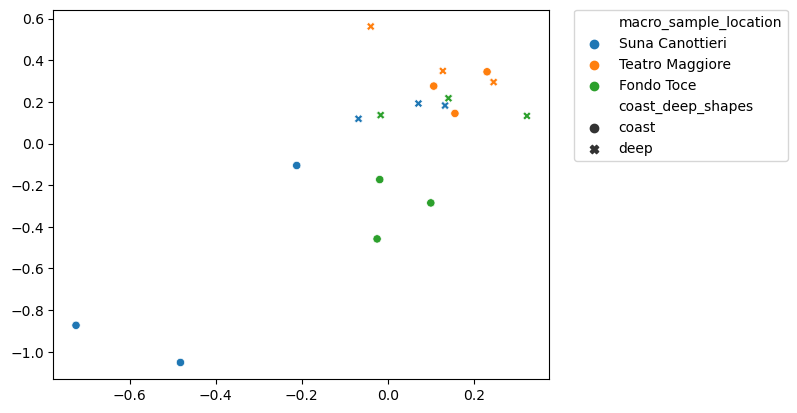

In [30]:
bh_colors_samples_id = bh_newdf["macro_sample_ids"]
bh_colors_samples    = bh_newdf["macro_sample_location"]
bh_shapes_samples    = bh_newdf["coast_deep_shapes"]

# plot = plt.scatter(bh_nmds_Xt[:,0], bh_nmds_Xt[:,1], c=bh_colors_samples_id, cmap="Paired")
# plt.legend(handles=plot.legend_elements()[0], labels=sorted(set(bh_colors_samples)))

plot = sns.scatterplot(x=bh_nmds_Xt[:,0], y=bh_nmds_Xt[:,1], hue=bh_colors_samples, palette="tab10", style=bh_shapes_samples)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## m_argclass

In [31]:
ac_X = ac_newdf[argclass_features]

ac_dist_manhattan = manhattan_distances(ac_X)
ac_nmds = MDS(dissimilarity='precomputed', random_state=0, metric=False)

ac_nmds_Xt = ac_nmds.fit_transform(ac_dist_manhattan)

/home/davide/mambaforge/envs/microbial_res/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


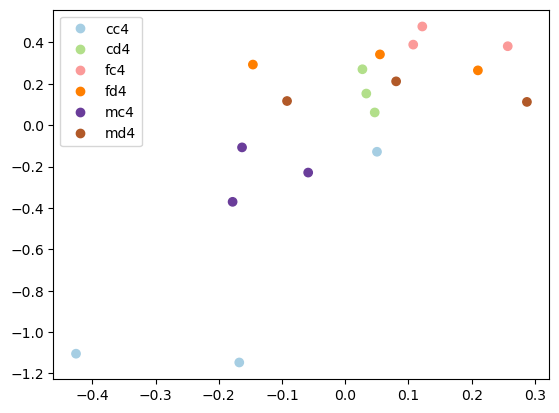

In [32]:
ac_colors_samples_id = ac_newdf["sample_ids"]
ac_colors_samples    = ac_newdf["sample"]

plot = plt.scatter(ac_nmds_Xt[:,0], ac_nmds_Xt[:,1], c=ac_colors_samples_id, cmap="Paired")
plt.legend(handles=plot.legend_elements()[0], labels=sorted(set(ac_colors_samples)))
plt.show()

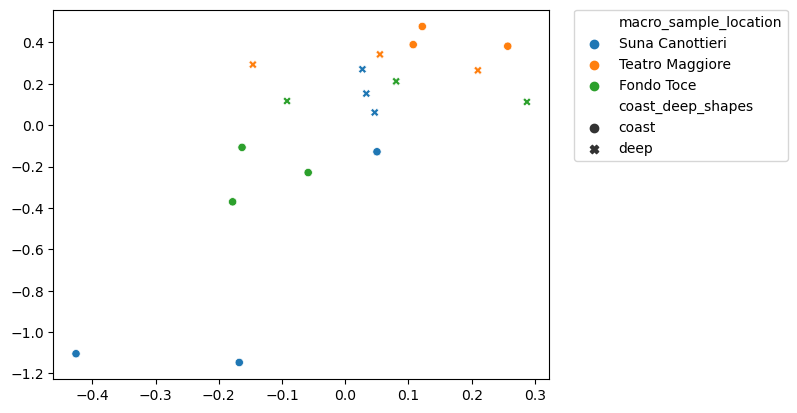

In [33]:
ac_colors_samples_id = ac_newdf["macro_sample_ids"]
ac_colors_samples    = ac_newdf["macro_sample_location"]
ac_shapes_samples    = ac_newdf["coast_deep_shapes"]

# plot = plt.scatter(ac_nmds_Xt[:,0], ac_nmds_Xt[:,1], c=ac_colors_samples_id, cmap="Paired")
# plt.legend(handles=plot.legend_elements()[0], labels=sorted(set(ac_colors_samples)))

plot = sns.scatterplot(x=ac_nmds_Xt[:,0], y=ac_nmds_Xt[:,1], hue=ac_colors_samples, palette="tab10", style=ac_shapes_samples)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## m_arg

In [34]:
arg_X = arg_newdf[arg_features]

arg_dist_manhattan = manhattan_distances(arg_X)
arg_nmds = MDS(dissimilarity='precomputed', random_state=0, metric=False)

arg_nmds_Xt = arg_nmds.fit_transform(arg_dist_manhattan)

/home/davide/mambaforge/envs/microbial_res/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


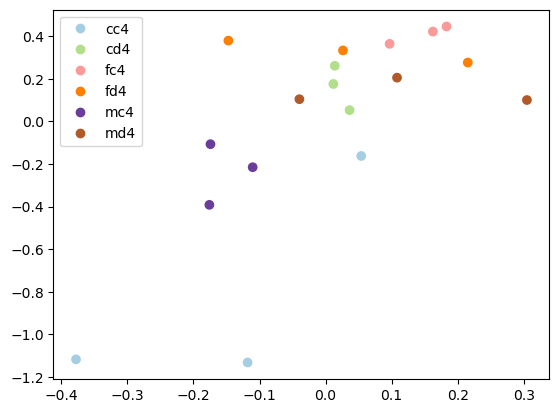

In [35]:
arg_colors_samples_id = arg_newdf["sample_ids"]
arg_colors_samples    = arg_newdf["sample"]

plot = plt.scatter(arg_nmds_Xt[:,0], arg_nmds_Xt[:,1], c=arg_colors_samples_id, cmap="Paired")
plt.legend(handles=plot.legend_elements()[0], labels=sorted(set(arg_colors_samples)))
plt.show()

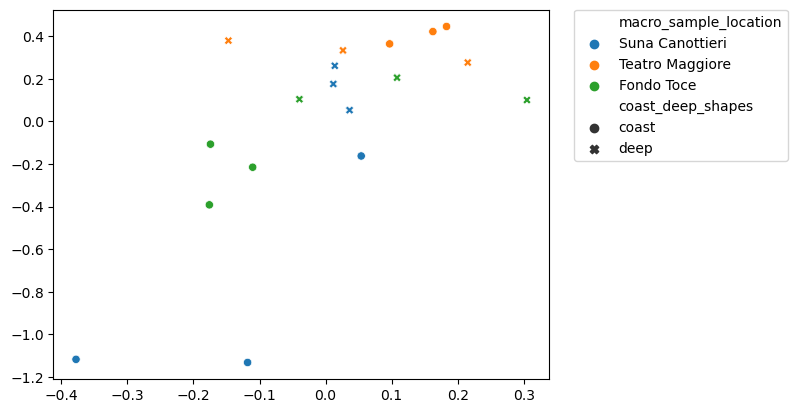

In [36]:
arg_colors_samples_id = arg_newdf["macro_sample_ids"]
arg_colors_samples    = arg_newdf["macro_sample_location"]
arg_shapes_samples    = arg_newdf["coast_deep_shapes"]

# plot = plt.scatter(arg_nmds_Xt[:,0], arg_nmds_Xt[:,1], c=arg_colors_samples_id, cmap="Paired")
# plt.legend(handles=plot.legend_elements()[0], labels=sorted(set(arg_colors_samples)))

plot = sns.scatterplot(x=arg_nmds_Xt[:,0], y=arg_nmds_Xt[:,1], hue=arg_colors_samples, palette="tab10", style=arg_shapes_samples)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

# Random Forest on BEST HIT

In [129]:
y = arg_newdf['sample_ids']
X = arg_newdf[arg_features]


from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)


In [130]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=900, 
                             max_depth=7,
                             random_state=SEED)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.25         4
   macro avg       0.20      0.10      0.13         4
weighted avg       0.50      0.25      0.33         4



/home/davide/mambaforge/envs/microbial_res/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davide/mambaforge/envs/microbial_res/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davide/mambaforge/envs/microbial_res/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

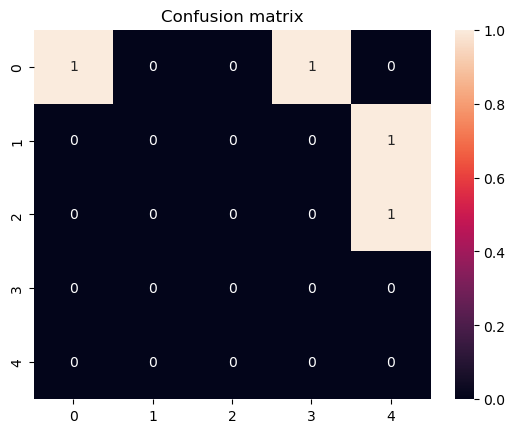

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

print(classification_report(y_test,y_pred))

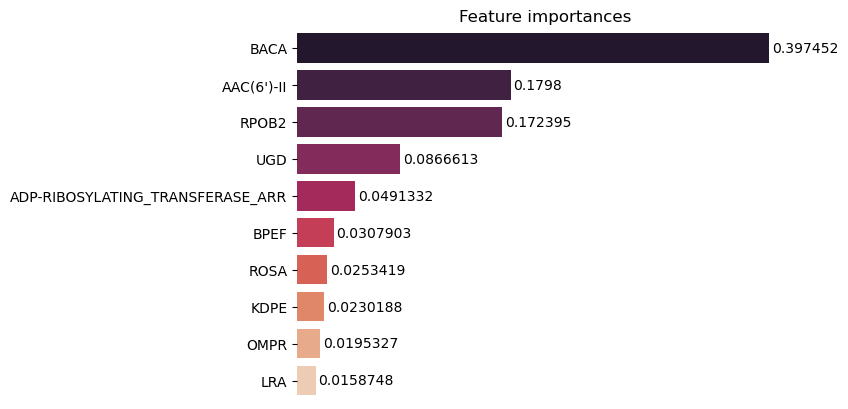

In [132]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted[:10], x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)